# Métodos estatísticos para análise de ações

## Bibliotecas importadas

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import pandas_datareader as pdr 
import pandas_datareader.data as web
import datetime 
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('seaborn')

Definição do intervalo de tempo para análise de dados:

In [2]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2022, 1, 1)

A amostra de dados será composta pelos preços de ações da 3R PETROLEUM desde 01 de janeiro de 2018 até 01 de janeiro de 2022. Os dados serão obtidos da API yahoo finance.

In [5]:
RRRP3 = web.DataReader('RRRP3.SA', 'yahoo', start, end)

In [6]:
RRRP3.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-23,31.790001,31.059999,31.549999,31.270000,760400,31.270000
2021-12-27,32.070000,31.000000,31.000000,31.770000,1254100,31.770000
2021-12-28,32.919998,31.790001,31.990000,32.070000,1921500,32.070000
2021-12-29,33.639999,31.820000,32.259998,33.480000,2851300,33.480000
2021-12-30,34.299999,33.110001,33.320000,33.549999,7855700,33.549999


In [7]:
RRRP3.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-13,21.350000,20.799999,21.000000,20.799999,470000,20.799999
2020-11-16,21.250000,20.969999,21.150000,21.000000,175800,21.000000
2020-11-17,20.990000,20.650000,20.940001,20.990000,256600,20.990000
2020-11-18,21.070000,20.900000,20.990000,20.900000,96600,20.900000
2020-11-19,21.040001,20.820000,21.000000,20.900000,84300,20.900000


Estatísticas básicas:

In [8]:
print(f"Média: {RRRP3['Close'].mean():.4f}")
print(f"Mediana: {RRRP3['Close'].median():.4f}")
print(f"Moda: {RRRP3['Close'].mode().loc[0]:.4f}")

Média: 37.0565
Mediana: 37.5750
Moda: 36.0000


Criação do histrograma da distribuição retornos simples

In [9]:
RRRP3_returns = RRRP3['Close'].pct_change()
RRRP3_returns.head()

Date
2020-11-13         NaN
2020-11-16    0.009615
2020-11-17   -0.000476
2020-11-18   -0.004288
2020-11-19    0.000000
Name: Close, dtype: float64

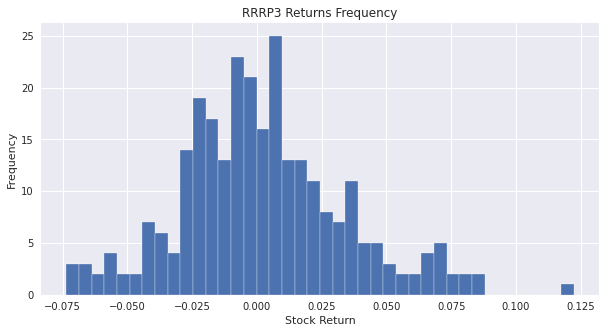

In [10]:
N = RRRP3_returns.shape[0]
k = int(np.round(1 + 3.3222 * np.log10(N)))

ax = RRRP3_returns.hist(bins=40, edgecolor='white', figsize=(10,5))
ax.set_xlabel('Stock Return')
ax.set_ylabel('Frequency')
ax.set_title('RRRP3 Returns Frequency')
plt.show()


Histograma dos retornos logarítmicos

In [11]:
RRRP3_log_returns = np.log(RRRP3['Close'] / RRRP3['Close'].shift(1))

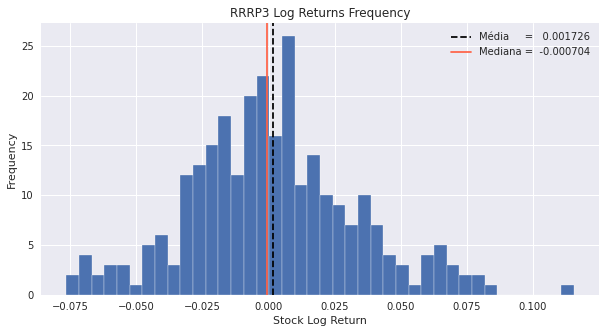

In [12]:
median = RRRP3_log_returns.median()
mean = RRRP3_log_returns.mean()

ax = RRRP3_log_returns.hist(bins=40, edgecolor='white', figsize=(10,5))
ax.axvline(mean, color='black',  linestyle='dashed', label=f'Média     = {mean:>10.6f}')
ax.axvline(median, color='tomato', label=f'Mediana = {median:>10.6f}')

ax.set_xlabel('Stock Log Return')
ax.set_ylabel('Frequency')
ax.set_title('RRRP3 Log Returns Frequency')
plt.legend()
plt.show()


Note-se que a média e a media dos retornos logarítmicos são levemente diferentes. De fato, a distribuição desses dados apresenta uma assimetria negativa igual a: 

In [13]:
RRRP3_log_returns.skew()

0.3044967235834157

Além da assimetria, calculada acima, outra importante medida descritiva dos dados é a curtose. Para os retornos logarítmicos, a curtose é igual a:

In [14]:
RRRP3_log_returns.kurtosis()

0.4533363523839098

Intervalo Interquartil e _boxplots_

O intergalo interquartil ($IQR$) é uma forma simples de verificar a dispersão dos dados. Essa medida de espalhamento é dada pela fórmula
$$IQR = Q_3 - Q_1$$
onde $Q_1$ e $Q_3$ são respectivamente o primeiro e o terceiro quartis.

O intervalo interquartil é comumente utilizado para detecção de _outliers_ de uma distribuição de dados. No caso da distribuição de preços de fechamento, temos:

In [15]:
q1 = RRRP3['Close'].quantile(0.25)
q3 = RRRP3['Close'].quantile(0.75)
iqr = q3 - q1
outliers_low = q1 - 1.5 * iqr
outliers_high = q3 + 1.5 * iqr

In [16]:
print(outliers_low, outliers_high)

22.79749870300293 52.23750114440918


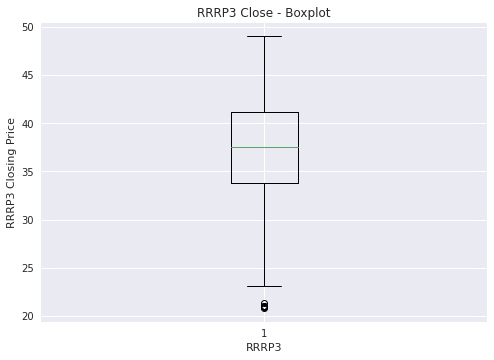

In [17]:
ax = plt.boxplot(RRRP3['Close'])
plt.title('RRRP3 Close - Boxplot')
plt.xlabel('RRRP3')
plt.ylabel('RRRP3 Closing Price')

plt.show()

## Gráficos de Densidade por Kernel e Volatilidade

### Variância

Além do Intervalo Interquaril, a dispersão de daddos pode ser medida pela variância ($\sigma^2$) e pelo Desvio Padrão ($\sigma$). A fórmula da variância é mostrada abaixo:

$$\sigma^2 = \sum \dfrac{(x - \bar{x})}{n}$$
em que:

- $x$: dado pontual
- $\bar{x}$: média dos dados
- $n$: quantidade de dados

O desvio padrão é simplesmente a raiz quadrada da variância, ou seja:

$$\sigma = \sqrt{\sigma^2} = \sqrt{\sum \dfrac{(x - \bar{x})}{n}}$$

Para a distribuição de retornos logarítmicos, o desvio padrão e a variância são iguais a:

In [18]:
var = RRRP3_log_returns.var()
std = RRRP3_log_returns.std()

print(f"""
Desvio padão: {std:.3f}
Variância: {var:.6f}
""")


Desvio padão: 0.032
Variância: 0.001027



Essas medidas dão uma indicação do risco do ativo analisado. Em finanças, o desvio padrão é frequentemente referido como **volatilidade**.

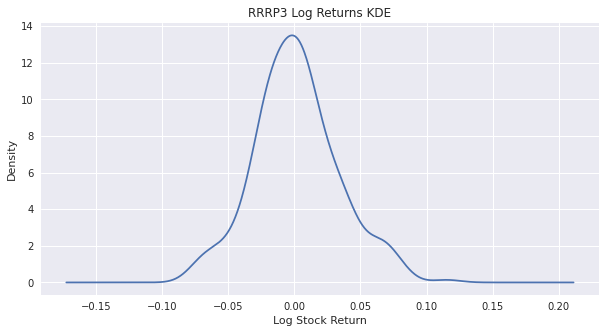

In [19]:
RRRP3_log_returns.plot(kind='kde', bw_method='scott', label='RRRP3', figsize=(10,5))
plt.xlabel('Log Stock Return')
plt.ylabel('Density')
plt.title('RRRP3 Log Returns KDE')
plt.show()


## Covariância e Correlação

Quando tentamos compreender a relação entre diferentes ativos, duas abordagens quantitativas que podem ser úteis são a covariância e a correlação.

Dados dois ativos $a$ e $b$ com retornos respectivamente iguais a $R_a$ e $R_b$, a covariância é dada por:

$$Cov(R_a, R_b) = E\left\{ [R_a - E(R_a)][R_b - E(R_b)]  \right\}$$

In [20]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2022, 1, 1)

In [21]:
RRRP3 = web.DataReader('RRRP3.SA', 'yahoo', start, end)
BVSP = web.DataReader('^BVSP', 'yahoo', start, end)

In [22]:
RRRP3['Returns'] = RRRP3['Close'].pct_change()
BVSP['Returns'] = BVSP['Close'].pct_change()

In [23]:
RRRP3['Returns'] = RRRP3['Returns'].dropna()
BVSP['Returns'] = BVSP['Returns'].dropna()

In [24]:
RRRP3

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
2020-11-13,21.350000,20.799999,21.000000,20.799999,470000,20.799999,NaN
2020-11-16,21.250000,20.969999,21.150000,21.000000,175800,21.000000,0.009615
2020-11-17,20.990000,20.650000,20.940001,20.990000,256600,20.990000,-0.000476
2020-11-18,21.070000,20.900000,20.990000,20.900000,96600,20.900000,-0.004288
2020-11-19,21.040001,20.820000,21.000000,20.900000,84300,20.900000,0.000000
...,...,...,...,...,...,...,...
2021-12-23,31.790001,31.059999,31.549999,31.270000,760400,31.270000,-0.006671
2021-12-27,32.070000,31.000000,31.000000,31.770000,1254100,31.770000,0.015990
2021-12-28,32.919998,31.790001,31.990000,32.070000,1921500,32.070000,0.009443


In [26]:
rrrp3_bvsp = pd.concat([RRRP3['Returns'], BVSP['Returns']], axis=1).dropna()
rrrp3_bvsp.columns = ['RRRP3 Returns', 'BVSP Returns']
rrrp3_bvsp.head()

,RRRP3 Returns,BVSP Returns
Date,,
2020-11-16,0.009615,0.018352
2020-11-17,-0.000476,0.007507
2020-11-18,-0.004288,-0.006957
2020-11-19,0.000000,0.000319
2020-11-23,0.005742,0.008093


In [27]:
covariance = rrrp3_bvsp.cov()
covariance

,RRRP3 Returns,BVSP Returns
RRRP3 Returns,0.001042,0.000201
BVSP Returns,0.000201,0.000167


### Correlação

$$Corr(R_a, R_b) = \dfrac{Cov(R_a, R_b)}{\sigma(R_a) \sigma(R_b)}$$

In [28]:
correlation = rrrp3_bvsp.corr()
correlation

,RRRP3 Returns,BVSP Returns
RRRP3 Returns,1.000000,0.480773
BVSP Returns,0.480773,1.000000


## Gráficos de dispersão e Mapas de calor

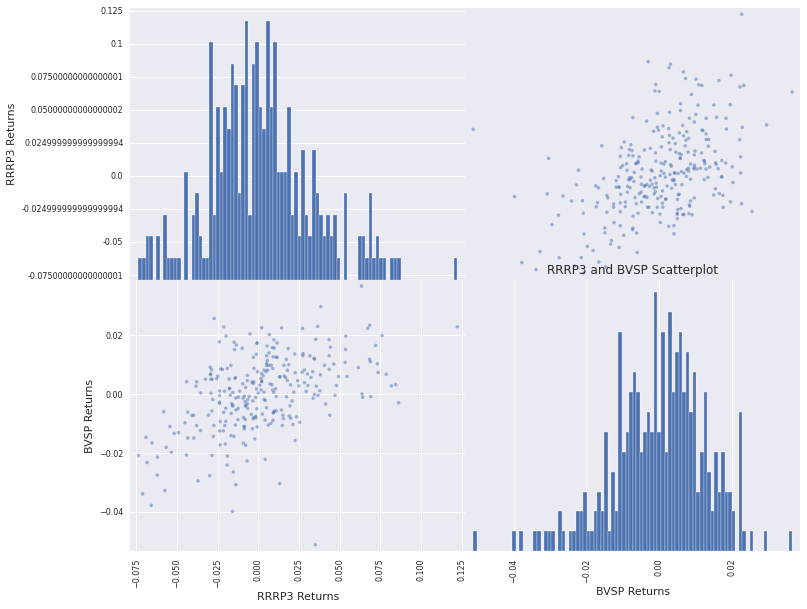

In [29]:
scatter_matrix(rrrp3_bvsp, figsize=(12, 10), alpha=0.5, hist_kwds={'bins':90, 'edgecolor':'white'})
_=plt.title('RRRP3 and BVSP Scatterplot')
plt.show()

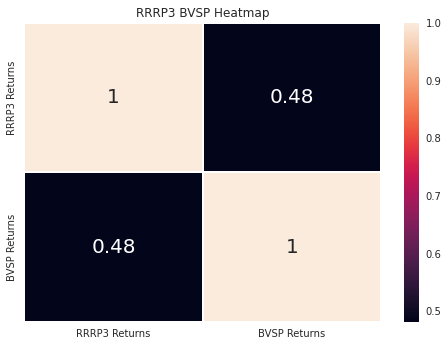

In [30]:
sns.heatmap(correlation, annot=True, cmap=None, linewidths=0.3, annot_kws={'size': 20})

_=plt.title('RRRP3 BVSP Heatmap')

plt.show()